In [1]:
import os

In [2]:
data_dir = 'C:\\Users\\Equipo\\Downloads\\cell_images\\cell_images'

In [3]:
os.listdir(data_dir)

['test', 'train']

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from matplotlib.image import imread

In [6]:
test_path = data_dir+ '\\test\\'
train_path = data_dir+'\\train\\'

In [7]:
test_path

'C:\\Users\\Equipo\\Downloads\\cell_images\\cell_images\\test\\'

In [8]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [9]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [11]:
os.listdir(train_path+'parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [12]:
para_cell = train_path+'parasitized\\'+'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [13]:
para_cell

'C:\\Users\\Equipo\\Downloads\\cell_images\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

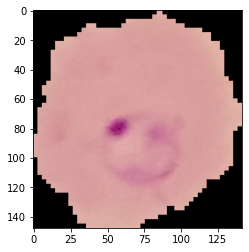

In [15]:
plt.imshow(imread(para_cell))

In [17]:
os.listdir(train_path+'uninfected')[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [18]:

uninfected_cell = train_path+'uninfected\\'+'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [19]:
uninfected_cell = imread(uninfected_cell)

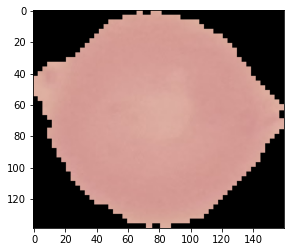

In [20]:
plt.imshow(uninfected_cell)

In [21]:
pwd

'C:\\Users\\Equipo\\Downloads\\2.1 FINAL_TF2_FILES.zip\\TF_2_Notebooks_and_Data\\04-CNNs'

In [25]:
len(os.listdir(test_path+'parasitized'))

1300

In [24]:
len(os.listdir(test_path+'uninfected'))

1300

In [27]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+'uninfected'):
    
    img = imread(test_path+'uninfected\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [28]:
dim1

[118,
 172,
 130,
 163,
 172,
 139,
 151,
 160,
 145,
 127,
 121,
 154,
 145,
 127,
 154,
 151,
 148,
 130,
 160,
 136,
 139,
 190,
 127,
 133,
 136,
 124,
 151,
 151,
 151,
 160,
 118,
 154,
 154,
 121,
 127,
 118,
 130,
 124,
 163,
 88,
 139,
 127,
 121,
 139,
 166,
 133,
 124,
 154,
 139,
 127,
 124,
 136,
 166,
 133,
 145,
 157,
 181,
 148,
 112,
 124,
 112,
 106,
 121,
 148,
 148,
 112,
 121,
 148,
 97,
 112,
 142,
 118,
 130,
 151,
 133,
 136,
 115,
 145,
 115,
 142,
 136,
 130,
 142,
 124,
 142,
 136,
 166,
 148,
 136,
 142,
 133,
 130,
 139,
 124,
 139,
 121,
 130,
 142,
 133,
 118,
 157,
 127,
 109,
 112,
 139,
 142,
 142,
 112,
 118,
 100,
 127,
 145,
 136,
 160,
 187,
 130,
 130,
 157,
 130,
 130,
 151,
 175,
 145,
 136,
 157,
 133,
 127,
 154,
 133,
 151,
 130,
 136,
 160,
 130,
 139,
 145,
 145,
 145,
 154,
 133,
 160,
 142,
 157,
 145,
 136,
 121,
 115,
 121,
 121,
 127,
 145,
 130,
 133,
 142,
 127,
 121,
 139,
 118,
 118,
 148,
 121,
 145,
 130,
 169,
 142,
 136,
 148,


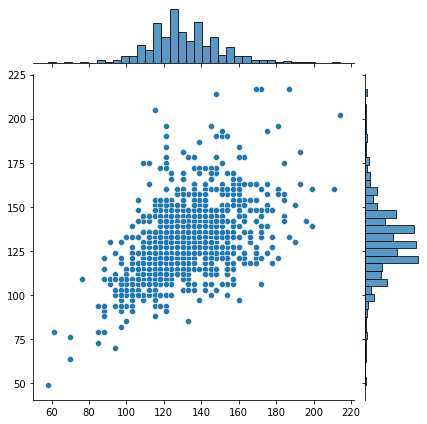

In [29]:
sns.jointplot(x=dim1,y=dim2)

In [34]:
np.mean(dim1)


130.92538461538462

In [33]:
np.mean(dim2)

130.75

In [35]:
image_shape = (130,130,3)

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [37]:
imread(para_cell).max()

0.9098039

In [38]:
image_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest')

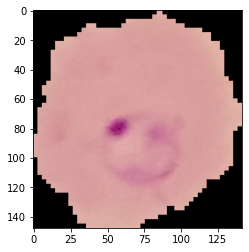

In [41]:
para_img = imread(para_cell)

plt.imshow(para_img)

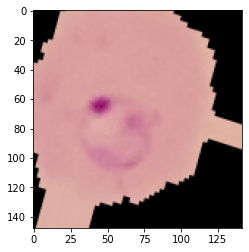

In [45]:
plt.imshow(image_gen.random_transform(para_img))

In [46]:
train_path

'C:\\Users\\Equipo\\Downloads\\cell_images\\cell_images\\train\\'

In [47]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [48]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout,Flatten

In [55]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape,
                activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape,
                activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape,
                activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',
             metrics=['accuracy'])


In [56]:
from tensorflow.keras.callbacks import EarlyStopping

In [57]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [58]:
batch_size = 16

In [60]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                             target_size=image_shape[:2],
                                             color_mode='rgb',
                                             batch_size=batch_size,
                                             class_mode='binary')

Found 24958 images belonging to 2 classes.


In [61]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                             target_size=image_shape[:2],
                                             color_mode='rgb',
                                             batch_size=batch_size,
                                             class_mode='binary',
                                              shuffle=False)

Found 2600 images belonging to 2 classes.


In [62]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [63]:
# results = model.fit_generator(train_image_gen, epochs=20, 
#                              validation_data=test_image_gen,
#                              callbacks=[early_stop])

C:\Users\Equipo\AppData\Local\Temp\ipykernel_30140\19830328.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_image_gen, epochs=20,


Epoch 1/20
 153/1560 [=>............................] - ETA: 4:28 - loss: 2.1222 - accuracy: 0.5274

KeyboardInterrupt: 

In [64]:
from tensorflow.keras.models import load_model


In [65]:
model = load_model('malaria_detector.h5')

In [68]:
pred = model.predict(test_image_gen)

163/163 [==============================] - 11s 65ms/step


In [69]:
pred

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [0.]], dtype=float32)

In [78]:
predictions = pred > 0.80

In [77]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

In [72]:
len(pred)

2600

In [73]:
from sklearn.metrics import classification_report, confusion_matrix

In [75]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [80]:
print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1300
           1       0.98      0.77      0.86      1300

    accuracy                           0.88      2600
   macro avg       0.90      0.88      0.88      2600
weighted avg       0.90      0.88      0.88      2600



In [81]:
print(confusion_matrix(test_image_gen.classes, predictions))

[[1281   19]
 [ 299 1001]]


In [82]:
from tensorflow.keras.preprocessing import image

In [85]:
my_image = image.load_img(para_cell, target_size=image_shape)

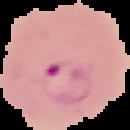

In [86]:
my_image

In [87]:
my_img_arr = image.img_to_array(my_image)

In [89]:
my_img_arr.shape

(130, 130, 3)

In [91]:
my_img_arr = np.expand_dims(my_img_arr, axis=0)

In [92]:
my_img_arr.shape

(1, 130, 130, 3)

In [93]:
model.predict(my_img_arr)

1/1 [==============================] - 0s 69ms/step


array([[0.]], dtype=float32)

In [94]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}